In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from collections import Counter 

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

### Doing Bayesian anaysis

page 159: 14 success out of 20 flips

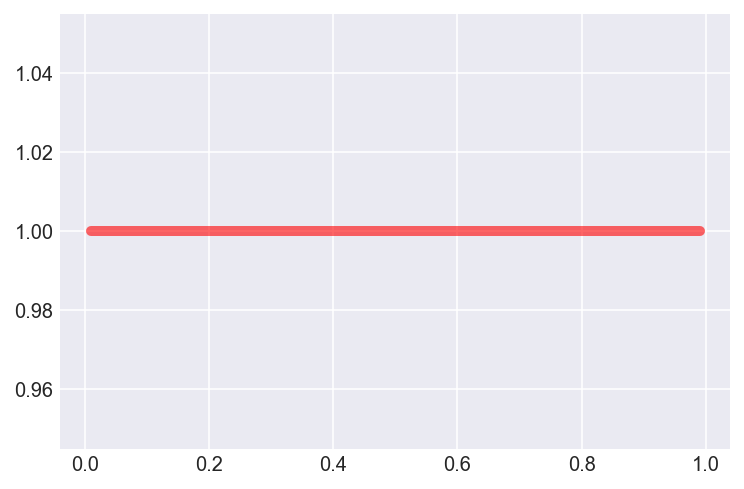

In [6]:
# prior: beta(1,1)
a, b = 1, 1
# x grid points
x = np.linspace(stats.beta.ppf(0.01, a, b),stats.beta.ppf(0.99, a, b), 100)
y = stats.beta.pdf(x, a, b)
plt.plot(x, y,'r-', lw=5, alpha=0.6, label='beta pdf')

In [25]:
theta = 0.01
num_simulations = 1000
a, b = 1, 1

In [110]:
def gen_likelihood_function(z, N):
    "Bernoulli distribution"
    return lambda theta: theta**z * (1-theta)**(N-z)

In [111]:
def gen_proposed_function(sd=1):
    return lambda : stats.norm.rvs(0, sd)

In [112]:
def next_param(current_param, likelihood, proposed):
    
    delta = proposed()
    proposed_param = current_param + delta
    
    # upperbound and lowerbound
    upperbound = 1
    lowerbound = 0
    
    if (proposed_param > upperbound) or (proposed_param < lowerbound):
        p_accept = 0
    else:
        p_accept = min(1, likelihood(proposed_param) / likelihood(current_param))
    
    p = stats.uniform.rvs()
    if p < p_accept:
        return proposed_param
    else:
        return current_param
    

In [113]:
hist = np.zeros(num_simulations)
theta = 0.01
hist[0] = theta
z, N = 14, 20
sd = 1
likelihood = gen_likelihood_function(z, N)
proposed = gen_proposed_function(sd)

for idx in range(1, num_simulations):
    current_param = hist[idx-1]
    hist[idx] = next_param(current_param, likelihood, proposed)

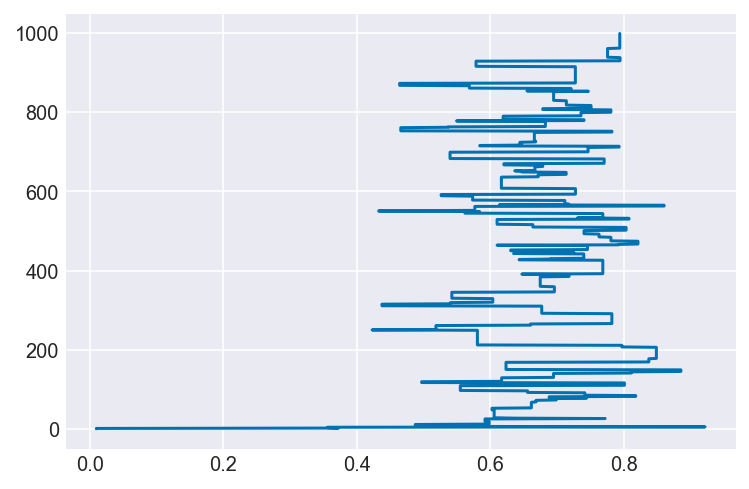

In [114]:
plt.plot(hist, range(num_simulations))

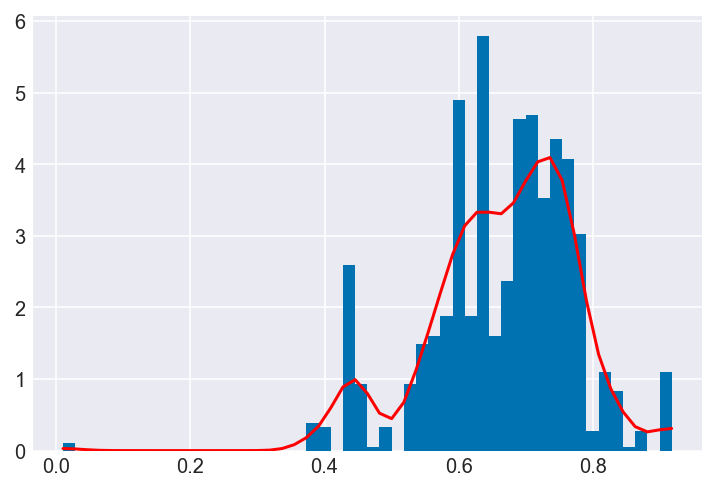

In [84]:
density = stats.gaussian_kde(hist)
n, x, _ = plt.hist(hist,bins=50, density=True)
plt.plot(x, density(x), 'r')

### Density plot of histogram

In [15]:
vec = [stats.norm.rvs(0, 1) for k in range(1000)]
density = stats.gaussian_kde(vec)
xs = np.linspace(-3,3,len(vec))

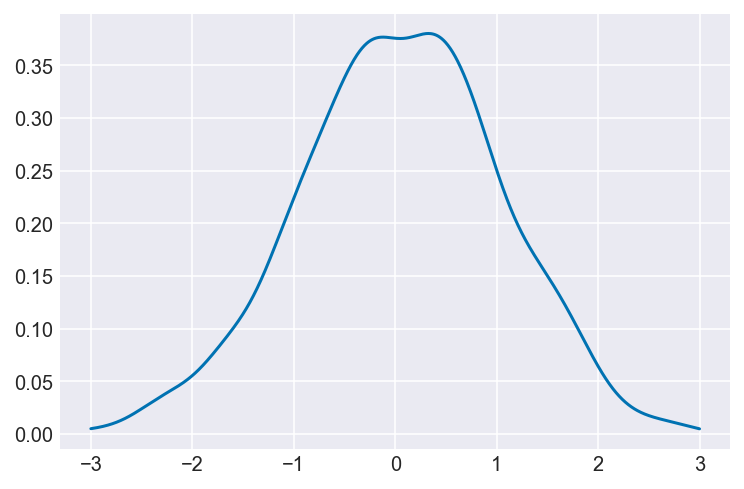

In [20]:
plt.plot(xs,density(xs))

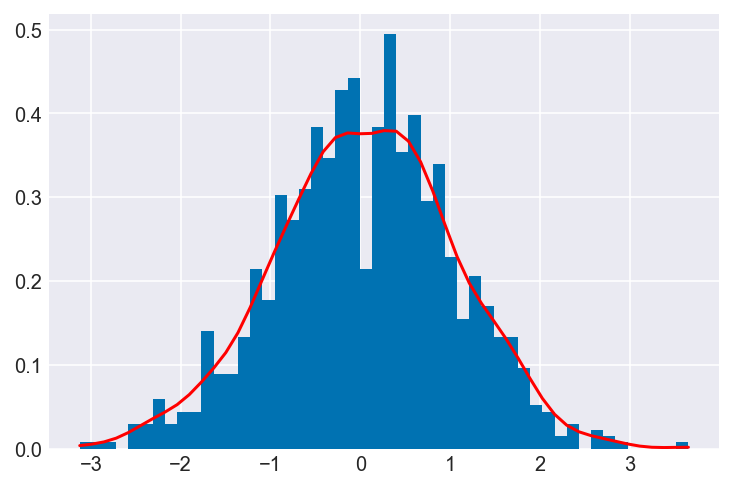

In [24]:
n, x, _ = plt.hist(vec,bins=50, density=True)
plt.plot(x, density(x), 'r')

### Beta

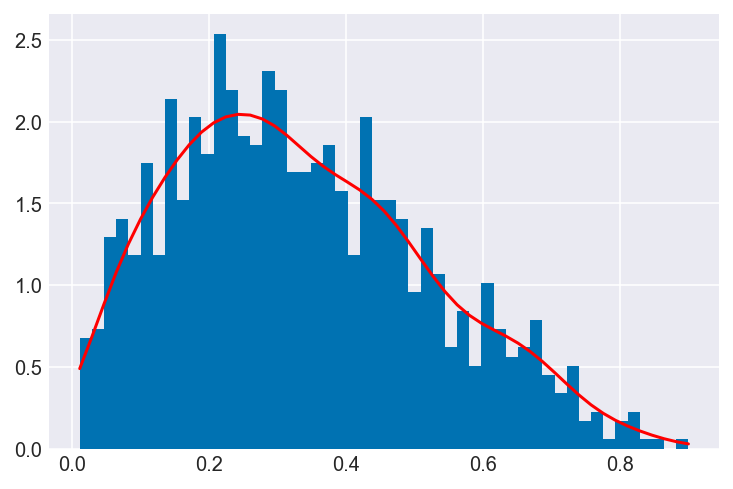

In [41]:
a, b = 2,4
vec = [stats.beta.rvs(a, b) for k in range(1000)]
density = stats.gaussian_kde(vec)
n, x, _ = plt.hist(vec,bins=50, density=True)

plt.plot(x, density(x), 'r')